# 10 Minutes to Polars
 
To help you get started this notebook introduces some of the key concepts that make Polars a powerful data analysis tool. 

The key concepts we meet are:
- fast flexible analysis with the **Expression API** in Polars
- easy **parallel** computations
- automatic **query optimisation** in **lazy mode**
- **streaming** to work with larger-than-memory datasets in Polars

## Importing Polars
We begin by importing polars as `pl`

In [1]:
import polars as pl

## Setting configuration options
Before we start exploring a dataset we are going to control how a `DataFrame` is print on the screen. We control configuration using options in `pl.Config` - [see the API docs for the full range](https://pola-rs.github.io/polars/py-polars/html/reference/config.html).

In this notebook we want Polars to:
- print up to 8 rows of each `DataFrame` so we use `pl.Config.set_tbl_rows` and 
- print up to 10 columns of each `DataFrame` so we use `pl.Config.set_tbl_cols`

In [2]:
pl.Config.set_tbl_rows(8)
pl.Config.set_tbl_cols(10)

polars.cfg.Config

We also want strings to be printed with up to 100 characters 

In [3]:
pl.Config.set_fmt_str_lengths(100)

polars.cfg.Config

You can find the full range of configuration options here: https://pola-rs.github.io/polars/py-polars/html/reference/config.html

## Creating a `DataFrame`
Polars can read from a wide range of data formats including CSV, Parquet, Arrow, JSON, Excel and database connections. See the [I/O section of the User Guide](https://pola-rs.github.io/polars-book/user-guide/howcani/io/intro.html) for more information.

For this introduction we use a CSV with the Titanic passenger dataset. This dataset gives details of all the passengers on the Titanic and whether they survived.

We begin by setting the path to the CSV

In [4]:
csvFile = "https://raw.githubusercontent.com/pola-rs/polars-static/master/data/titanic.csv"

We read the CSV into a Polars `DataFrame` with the `read_csv` function. 

We then call `head` to print out the first few rows of the `DataFrame`

In [5]:
df = pl.read_csv(csvFile)
df.head(3)

Id,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
i64,i64,i64,str,str,f64,i64,i64,f64
1,0,3,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,7.25
2,1,1,"""Cumings, Mrs. John Bradley (Florence Briggs Thayer)""","""female""",38.0,1,0,71.28
3,1,3,"""Heikkinen, Miss. Laina""","""female""",26.0,0,0,7.93


When we print out a `DataFrame` we get the shape and the dtype of each column below the column name.

Each row of this `DataFrame` has details about a passenger on the Titanic including the class they travelled in (`Pclass`), their name (`Name`) and `Age`.

A Polars `DataFrame` does not have an index. The lack of an index saves developer effort in setting and resetting the index.

## Accessing and transforming data

### Using square brackets

While you can use square brackets to select rows and columns in Polars...

In [6]:
df[:3,["Pclass","Name","Age"]]

Pclass,Name,Age
i64,str,f64
3,"""Braund, Mr. Owen Harris""",22.0
1,"""Cumings, Mrs. John Bradley (Florence Briggs Thayer)""",38.0
3,"""Heikkinen, Miss. Laina""",26.0


...this square bracket approach means that you won't get all the benefits of parallelisation, query optimisation and scalability that we see below. 

To really take advantage of Polars we use the Expression API to access and transform data.

### Selecting and transforming columns with the Expression API

We see a first example of the Expression API here where we select the `Pclass`, `Name` and `Age` columns inside a `select` statement

In [7]:
(
    df
    .select(
        [
            pl.col("Pclass"),
            pl.col("Name"),
            pl.col("Age"),
        ]
    )
)

Pclass,Name,Age
i64,str,f64
3,"""Braund, Mr. Owen Harris""",22.0
1,"""Cumings, Mrs. John Bradley (Florence Briggs Thayer)""",38.0
3,"""Heikkinen, Miss. Laina""",26.0
1,"""Futrelle, Mrs. Jacques Heath (Lily May Peel)""",35.0
...,...,...
1,"""Graham, Miss. Margaret Edith""",19.0
3,"""Johnston, Miss. Catherine Helen ""Carrie""""",null
1,"""Behr, Mr. Karl Howell""",26.0
3,"""Dooley, Mr. Patrick""",32.0


In the Expression API we begin by using `pl.col` to select to a column. We call the operation on each column an **expression**

### Transforming columns in the Expression API 
However, the Expression API allows us not only to select columns but also to transform them.

Here we select the same three columns, but with some transformations in each expression before we return them:
- we convert the integers in `Pclass` to the utf-8 string dtype with `cast`
- we get the number of words in each name with `str.to_lowercase` and
- we round off the age to the nearest whole number with `round`

In [8]:
(
    df
    .select(
        [
            pl.col("Pclass").cast(pl.Utf8),
            pl.col("Name").str.to_lowercase(),
            pl.col("Age").round(2)
        ]
    )
)

Pclass,Name,Age
str,str,f64
"""3""","""braund, mr. owen harris""",22.0
"""1""","""cumings, mrs. john bradley (florence briggs thayer)""",38.0
"""3""","""heikkinen, miss. laina""",26.0
"""1""","""futrelle, mrs. jacques heath (lily may peel)""",35.0
...,...,...
"""1""","""graham, miss. margaret edith""",19.0
"""3""","""johnston, miss. catherine helen ""carrie""""",null
"""1""","""behr, mr. karl howell""",26.0
"""3""","""dooley, mr. patrick""",32.0


### Parallel operations

In this example we passed a `list` of expressions to `select`. When we have multiple expressions Polars runs them in parallel. This is one example of how Polars handles parallelisation automatically.

### Chaining expressions
We chain expressions together to do multi-stage transformations on a column. 

In this example we output the name and count the number of words in each name by:
- splitting the `Name` column into a list of words with `str.split` and then
- counting the length of each list with `arr.lengths`

We add the word count as a new column by giving it an `alias` at the end of the expression

In [9]:
(
    df
    .select(
        [
            pl.col("Name"),
            pl.col("Name").str.split(" ").arr.lengths().alias("Name_word_count"),
        ]
    )
)

Name,Name_word_count
str,u32
"""Braund, Mr. Owen Harris""",4
"""Cumings, Mrs. John Bradley (Florence Briggs Thayer)""",7
"""Heikkinen, Miss. Laina""",3
"""Futrelle, Mrs. Jacques Heath (Lily May Peel)""",7
...,...
"""Graham, Miss. Margaret Edith""",4
"""Johnston, Miss. Catherine Helen ""Carrie""""",5
"""Behr, Mr. Karl Howell""",4
"""Dooley, Mr. Patrick""",3


## Adding a column
In the examples above we use `select` to return a subset of columns. To add a new column to the full `DataFrame` we use `with_column`

In [11]:
(
    df
    .with_column(
            pl.col("Name").str.split(" ").arr.lengths().alias("Name_word_count"),
    )
    .head(3)
)

Id,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Name_word_count
i64,i64,i64,str,str,f64,i64,i64,f64,u32
1,0,3,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,7.25,4
2,1,1,"""Cumings, Mrs. John Bradley (Florence Briggs Thayer)""","""female""",38.0,1,0,71.28,7
3,1,3,"""Heikkinen, Miss. Laina""","""female""",26.0,0,0,7.93,3


We add multiple new columns using `with_columns`

In [14]:
(
    df
    .with_columns(
        [
            pl.col("Name").str.split(" ").arr.lengths().alias("Name_word_count"),
            pl.col("Fare").round(1).alias("Fare_rounded")
        ]
    )
    .head(3)
)

Id,Survived,Pclass,Name,Sex,...,SibSp,Parch,Fare,Name_word_count,Fare_rounded
i64,i64,i64,str,str,...,i64,i64,f64,u32,f64
1,0,3,"""Braund, Mr. Owen Harris""","""male""",...,1,0,7.25,4,7.3
2,1,1,"""Cumings, Mrs. John Bradley (Florence Briggs Thayer)""","""female""",...,1,0,71.28,7,71.3
3,1,3,"""Heikkinen, Miss. Laina""","""female""",...,0,0,7.93,3,7.9


Square brackets **cannot** be used to add new columns, so the following does not work
```python
df["Fare_rounded"] = df["Fare"].round(1)
```


### Filtering a `DataFrame`

We filter a `DataFrame` by applying a condition in an expression.

In this example we find all the passengers over 70 years of age

In [10]:
(
    df
    .filter(
        pl.col("Age") > 70
    )
)

Id,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
i64,i64,i64,str,str,f64,i64,i64,f64
97,0,1,"""Goldschmidt, Mr. George B""","""male""",71.0,0,0,34.65
117,0,3,"""Connors, Mr. Patrick""","""male""",70.5,0,0,7.75
494,0,1,"""Artagaveytia, Mr. Ramon""","""male""",71.0,0,0,49.5
631,1,1,"""Barkworth, Mr. Algernon Henry Wilson""","""male""",80.0,0,0,30.0
852,0,3,"""Svensson, Mr. Johan""","""male""",74.0,0,0,7.78


We can specify multiple conditions with the `&` operator

In [16]:
(
    df
    .filter(
        (pl.col("Age") > 70) & (pl.col("Pclass") == 3)
    )
)

Id,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
i64,i64,i64,str,str,f64,i64,i64,f64
117,0,3,"""Connors, Mr. Patrick""","""male""",70.5,0,0,7.75
852,0,3,"""Svensson, Mr. Johan""","""male""",74.0,0,0,7.78


## Analytics
We begin by getting an overview of the `DataFrame` with `describe`

In [12]:
(
    df
    .describe()
)

describe,Id,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
str,f64,f64,f64,str,str,f64,f64,f64,f64
"""count""",891.0,891.0,891.0,"""891""","""891""",891.0,891.0,891.0,891.0
"""null_count""",0.0,0.0,0.0,"""0""","""0""",177.0,0.0,0.0,0.0
"""mean""",446.0,0.383838,2.308642,null,null,29.699118,0.523008,0.381594,32.204994
"""std""",257.353842,0.486592,0.836071,null,null,14.526497,1.102743,0.806057,49.693399
"""min""",1.0,0.0,1.0,"""Abbing, Mr. Anthony""","""female""",0.42,0.0,0.0,0.0
"""max""",891.0,1.0,3.0,"""van Melkebeke, Mr. Philemon""","""male""",80.0,8.0,6.0,512.33
"""median""",446.0,0.0,3.0,null,null,28.0,0.0,0.0,14.45


The output of `describe` shows us how many records there are, how many `null` values and some key statistics.

### Value counts on a column
We use `value_counts` to count occurences of values in a column.

In this example we count how many passengers there are in each class with `value_counts`

In [13]:
(
    df["Pclass"]
    .value_counts()
)

Pclass,counts
i64,u32
1,216
3,491
2,184


### Groupby and aggregations
Here we look at passenger survival by class.
- We first group by the `Survived` and the `Pclass` columns 
- We then aggregate in `agg` by counting the number of passengers in each group

In [14]:
(
    df
    .groupby(["Survived","Pclass"])
    .agg(
        pl.col("Id").count().alias("counts")
    )
)

Survived,Pclass,counts
i64,i64,u32
0,3,372
0,1,80
1,2,87
0,2,97
1,1,136
1,3,119


We use the Expression API for each aggregation in `agg`.

Groupby operations in Polars are fast because Polars has a parallel algorithm for getting the groupby keys. Aggregations are also fast because Polars runs multiple expressions in `agg` in parallel.

### Window operations
If we want to add a column that reflects not just data from that row but from a related group of rows we use a window operation. Windows occur in many contexts including rolling or temporal statistics and Polars covers these use cases.

One example of a window operation is when we want the percentage breakdown within a group. We use the `over` expression to do this window operation.

For example, here we use `over` to calculate what percentage of passengers in each class survived 

In [15]:
survived_percentage_df = (
    df
    # Groupby Survived and Pclass
    .groupby(["Survived","Pclass"])
    # Count the number of passengers in each group
    .agg(
        pl.col("Id").count().alias("counts")
    )
    # Divide the number of passengers in each group by the total passengers in each class
    .with_column(
        100*(
            pl.col("counts")/pl.col("counts").sum().over("Pclass")
        )
        .alias("% Survived")
    )
    # Sort the output
    .sort(["Pclass","Survived"],reverse=True)
)
survived_percentage_df

Survived,Pclass,counts,% Survived
i64,i64,u32,f64
1,3,119,24.236253
0,3,372,75.763747
1,2,87,47.282609
0,2,97,52.717391
1,1,136,62.962963
0,1,80,37.037037


## Lazy mode and query optimisation
In the examples above we work in eager mode. In eager mode Polars runs each part of a query step-by-step.

Polars has a powerful feature called lazy mode. In this mode Polars looks at a query as a whole to make a query graph. 

Before running the code Polars passes the query graph through its optimiser to see if there ways to make the query faster.

When working with a CSV we can work in lazy mode instead of eager mode by replacing `read_csv` with `scan_csv`

In [17]:
(
    pl.scan_csv(csvFile)
    .groupby(["Survived","Pclass"])
    .agg(
        pl.col("Id").count().alias("counts")
    )
)

The output of a lazy query is a `LazyFrame` and we see the graph of the unoptimized query plan when we output a `LazyFrame`.

### Query optimiser
We can see the optimised query plan that Polars will actually run by adding `describe_optimized_plan` at the end of the query

In [18]:
print(
    pl.scan_csv(csvFile)
    .groupby(["Survived","Pclass"])
    .agg(
        pl.col("Id").count().alias("counts")
    )
    .describe_optimized_plan()
)

  Aggregate
  	[col("Id").count().alias("counts")] BY [col("Survived"), col("Pclass")] FROM
  	  CSV SCAN titanic_mod.csv
  PROJECT 3/9 COLUMNS
  SELECTION: None




### Projection pushdown optimisation
In this example Polars has identified an optimisation and we see this on the second last line of the optimised query plan:
```python
PROJECT 3/12 COLUMNS
```
There are 12 columns in the CSV, but the query optimiser sees that only 3 of these columns are required for the query. When the query is evaluated Polars will `PROJECT` 3 out of 12 columns. This means that Polars will only read the 3 required columns from the CSV. 

This optimisation is called a *projection pushdown*. This projection saves memory and computation time.

You can also see the optimised query plan as a graph (if you have graphviz installed)

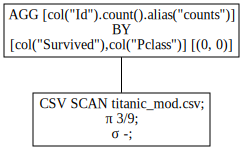

In [25]:
(
    pl.scan_csv(csvFile)
    .groupby(["Survived","Pclass"])
    .agg(
        pl.col("Id").count().alias("counts")
    )
    .show_graph()
)

### Predicate pushdown optimisation

A different optimisation happens when we add a `filter` to a query. In this case we want the same analysis of survival by class but only for passengers over 50

In [36]:
print(
    pl.scan_csv(csvFile)
    # Add a filter for passengers over 50
    .filter(pl.col("Age") > 50)
    .groupby(["Survived","Pclass"])
    .agg(
        pl.col("Id").count().alias("counts")
    )
    .describe_optimized_plan()
)

  Aggregate
  	[col("Id").count().alias("counts")] BY [col("Survived"), col("Pclass")] FROM
  	  CSV SCAN titanic_mod.csv
  PROJECT 4/9 COLUMNS
  SELECTION: Some([(col("Age")) > (50f64)])




In this example the query optimiser has seen that:
- 4 out of 12 columns are now required as we also do a filter on `Age`: `PROJECT 4/12 COLUMNS` and
- only passengers over 50 should be selected: `SELECTION: Some([(col("Age")) > (50f64)])`

This optimisation with a filter is called a *predicate pushdown* where the predicate is the condition 
```python
pl.col("Age") > 50
```

These optimisations are applied as Polars reads the CSV file so the whole dataset is not read into memory.

### Query evaluation

#### Full evaluation
To evaluate the query for all output rows we call `collect` 

In [28]:
(
    pl.scan_csv(csvFile)
    .filter(pl.col("Age") > 50)
    .groupby(["Survived","Pclass"])
    .agg(
        pl.col("Id").count().alias("counts")
    )
    .collect()
)

Survived,Pclass,counts
i64,i64,u32
0,3,9
0,1,21
1,2,3
0,2,12
1,1,18
1,3,1


#### Limited evaluation

During development with a large dataset it may be better to limit evaluation to a smaller number of output rows. We can do this by replacing `collect` with `fetch`

In [29]:
(
    pl.scan_csv(csvFile)
    .filter(pl.col("Age") > 50)
    .groupby(["Survived","Pclass"])
    .agg(
        pl.col("Id").count().alias("counts")
    )
    .fetch(3)
)

Survived,Pclass,counts
i64,i64,u32
0,1,1
1,2,1
1,1,1


Calling `fetch` is similar to a `LIMIT` clause in a SQL query.

## Streaming larger-than-memory datasets
By default Polars reads your full dataset into memory when evaluating a lazy query. 

However, if your dataset is too large to fit into memory Polars can run many core operations in *streaming* mode. With streaming Polars processes your query in batches rather than all at once. This allows Polars to scale to larger-than-memory datasets.

To enable streaming we pass the `streaming = True` argument to `collect`

In [34]:
(
    pl.scan_csv(csvFile)
    .filter(pl.col("Age") > 50)
    .groupby(["Survived","Pclass"])
    .agg(
        pl.col("Id").count().alias("counts")
    )
    .collect(streaming = True)
)

Survived,Pclass,counts
i64,i64,u32
0,2,12
0,1,21
1,3,1
1,2,3
0,3,9
1,1,18


## Summary
This notebook has been a quick overview of the key ideas that make Polars a powerful data analysis tool:
- expressions allow us to write complex transformations concisely and run them in parallel
- lazy mode allows Polars apply query optimisations that reduce memory usage and computation time
- streaming lets us process larger-than-memory datasets

## Next steps
The next step for you is to try Polars on your own data while going through this User Guide.

If you want more information on each function along with an example of use see the [API reference docs](https://pola-rs.github.io/polars/py-polars/html/reference/).

StackOverflow is a great place to start if you need help. There are many Polars questions on there already and your question might already by answered. If you need to ask a new questions you greatly improve your chances of getting help if you provide a minimal working example with some sample inputs, target outputs and your own best effort [as in this example](https://stackoverflow.com/questions/74562243/how-to-perform-split-merge-melt-with-python-and-polars). 

You should also [check in with the Polars community on Discord](https://discord.com/invite/4UfP5cfBE7). This is a great place to chat about how you are using Polars and how you think it could develop.